In [1]:
import numpy as np
import egttools as egt

In [2]:
# Parameters
payoffs = np.array([[-0.5, 2.], [0., 0]])
nb_strategies = 2; Z = 100; beta = 1
pop_states = np.arange(0, Z + 1, 1)

In [14]:
print("In a Hawk-Dove game, the Hawk strategy represents an aggressive individual, i.e., when it encounters other individuals (of any strategy) it will choose to fight. Doves, however, prefer to avoid confrontation. For this reason, when Hawks encounter other Hawks, they will fight and have a chance of ending badly injured. We represent this with a payoff of −0.5. On the other hand, when a Hawk encounters a Dove, the Dove will escape and the Hawk will be able to keep the resource in dispute. We represent this with a payoff of 2 for the Hawk and of 0 for the Dove. Finally, when Doves meet, they will share the resource, but this will give them no surplus and they will get a payoff of 0.")
print(payoffs)

In a Hawk-Dove game, the Hawk strategy represents an aggressive individual, i.e., when it encounters other individuals (of any strategy) it will choose to fight. Doves, however, prefer to avoid confrontation. For this reason, when Hawks encounter other Hawks, they will fight and have a chance of ending badly injured. We represent this with a payoff of −0.5. On the other hand, when a Hawk encounters a Dove, the Dove will escape and the Hawk will be able to keep the resource in dispute. We represent this with a payoff of 2 for the Hawk and of 0 for the Dove. Finally, when Doves meet, they will share the resource, but this will give them no surplus and they will get a payoff of 0.
[[-0.5  2. ]
 [ 0.   0. ]]


In [13]:
print("Number of strategies: {}".format(nb_strategies))
print("Number of states: {}".format(Z))
print("Beta: {}".format(beta))

Number of strategies: 2
Number of states: 100
Beta: 1


In [5]:
print(pop_states)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


In [6]:
# Define a game object that will hold the payoff matrix
game = egt.games.Matrix2PlayerGameHolder(nb_strategies, payoff_matrix = payoffs)

In [7]:
print(game)

Holder game object for matrix of expected payoffs for 2-player games.


In [8]:
# Evolver and calculate gradients
evolver = egt.analytical.PairwiseComparison(Z, game)
gradients = np.array([evolver.calculate_gradient_of_selection(beta, np.array([x, Z-x])) for x in range(Z + 1)])

In [9]:
print(evolver)

In [10]:
print(gradients)

[[ 0.          0.        ]
 [ 0.00761594 -0.00761594]
 [ 0.01497203 -0.01497203]
 [ 0.02206847 -0.02206847]
 [ 0.02890556 -0.02890556]
 [ 0.03548367 -0.03548367]
 [ 0.04180324 -0.04180324]
 [ 0.04786482 -0.04786482]
 [ 0.05366905 -0.05366905]
 [ 0.05921665 -0.05921665]
 [ 0.06450846 -0.06450846]
 [ 0.06954539 -0.06954539]
 [ 0.0743285  -0.0743285 ]
 [ 0.07885893 -0.07885893]
 [ 0.08313793 -0.08313793]
 [ 0.0871669  -0.0871669 ]
 [ 0.09094732 -0.09094732]
 [ 0.09448082 -0.09448082]
 [ 0.09776916 -0.09776916]
 [ 0.10081422 -0.10081422]
 [ 0.10361801 -0.10361801]
 [ 0.1061827  -0.1061827 ]
 [ 0.10851059 -0.10851059]
 [ 0.11060412 -0.11060412]
 [ 0.11246589 -0.11246589]
 [ 0.11409864 -0.11409864]
 [ 0.11550527 -0.11550527]
 [ 0.11668883 -0.11668883]
 [ 0.11765256 -0.11765256]
 [ 0.11839982 -0.11839982]
 [ 0.11893415 -0.11893415]
 [ 0.11925928 -0.11925928]
 [ 0.11937907 -0.11937907]
 [ 0.11929758 -0.11929758]
 [ 0.11901903 -0.11901903]
 [ 0.11854781 -0.11854781]
 [ 0.11788848 -0.11788848]
 

<Axes: xlabel='frequency of hawks (k/Z)', ylabel='gradient of selection (G)'>

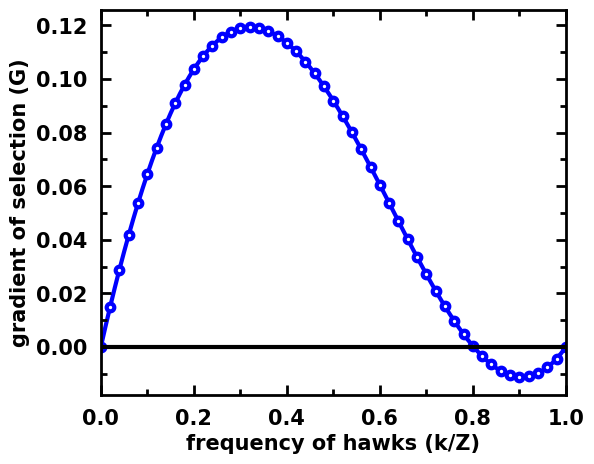

In [11]:
# Plot the results
egt.plotting.indicators.plot_gradients(gradients[:, 0], figsize=(6,5), marker_facecolor = 'white', xlabel = 'frequency of hawks (k/Z)', marker = 'o', marker_size = 30, marker_plot_freq = 2)